Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Data Collection 

In [3]:
wine_data = pd.read_csv('winequality-red.csv')

In [4]:
wine_data.shape

(1599, 12)

In [5]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visualization

In [7]:
#statistical features of the dataset
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


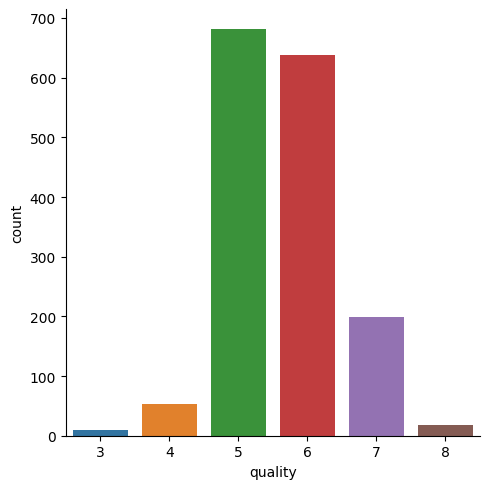

In [8]:
#number of values for each quality

sns.catplot(x='quality',data=wine_data, kind='count')

<AxesSubplot: xlabel='quality', ylabel='volatile acidity'>

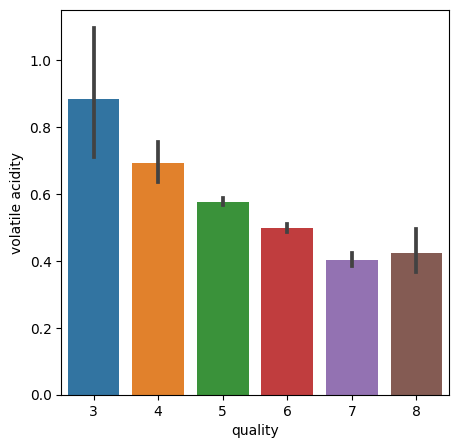

In [9]:
#volatile acidity Vs Quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity', data=wine_data)

<AxesSubplot: xlabel='quality', ylabel='citric acid'>

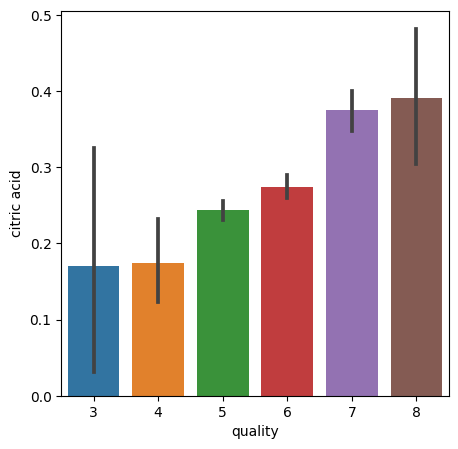

In [10]:
#Citric acid Vs Quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid', data=wine_data)

<AxesSubplot: xlabel='quality', ylabel='pH'>

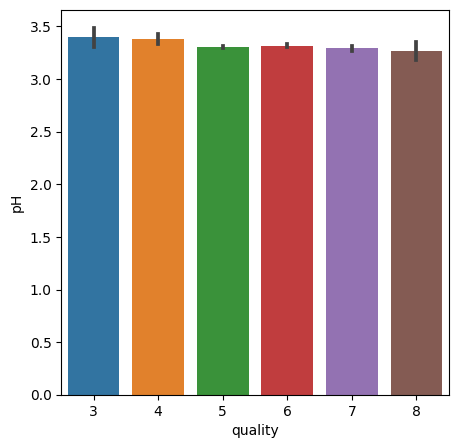

In [10]:
#pH Vs Quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='pH', data=wine_data)

Correlation:

1. Positive Correlation
2. Negative Correlation

In [11]:
correlation = wine_data.corr()

<AxesSubplot: >

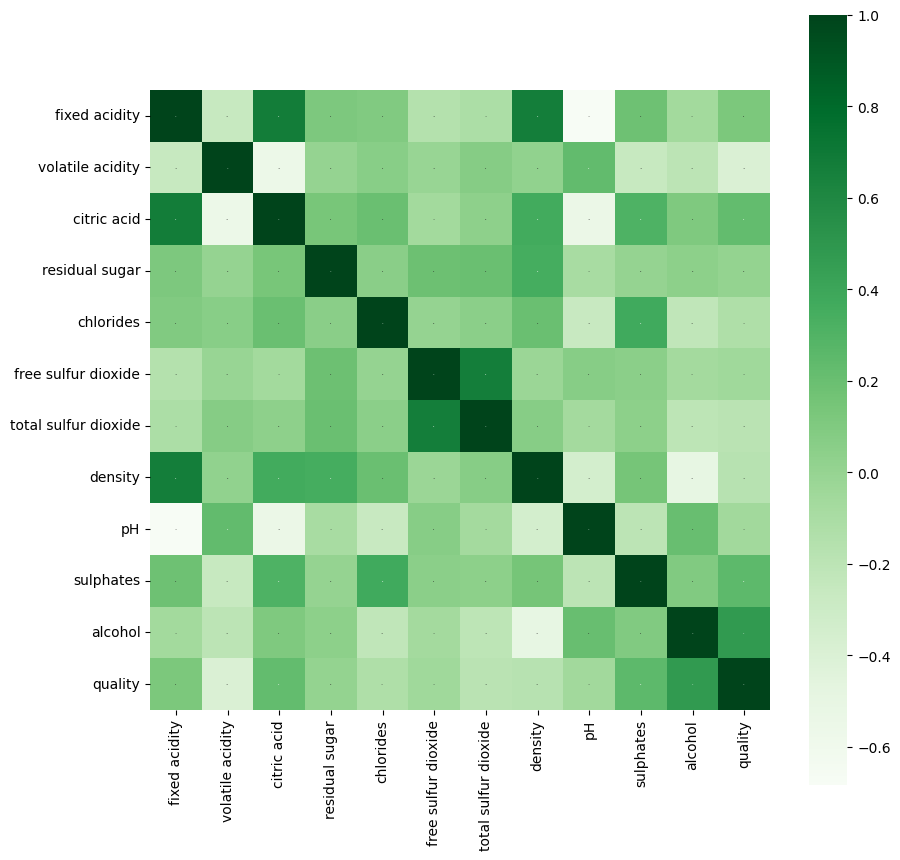

In [12]:
#constructing a heatmap to understand the correlation between columns

plt.figure(figsize=(10,10))

sns.heatmap(correlation, cbar=True, square = True, fmt='.1f', annot = True, annot_kws={'size':0.8}, cmap='Greens')

Data Preprocessing

In [13]:
#separate the data and labels

X= wine_data.drop(columns='quality', axis=1)

In [14]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Label Binarization

In [14]:
Y = wine_data['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [15]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Splitting our dataset

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.2, random_state=3 )

In [17]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Training Model: Random Forest Classifier

In [18]:
model = RandomForestClassifier()

In [19]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

In [20]:
#accuracy on test data

test_data_predict = model.predict(X_test)
test_error = accuracy_score(test_data_predict, Y_test)

In [21]:
print('Accuracy Score of Test Data: ',test_error)

Accuracy Score of Test Data:  0.9375


Building a Predictive System

In [22]:
input_data = (7.3,0.48,0.32,2.1,0.062,31.0,54.0,0.9972799999999999,3.3,0.65,10.0)

input_data_array = np.asarray(input_data)
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print("The quality of the wine is good.")
else:
    print("The quality of the wine is not good.")

[1]
The quality of the wine is good.


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
